***
# <font color=green size=10>CURSO DE ESTATÍSTICA - PARTE 2</font>
***

## Trabalho sobre Probabilidades, Amostragem e Estimações

Utilizando os conhecimentos adquiridos em nosso treinamento execute as tarefas abaixo. Siga o roteiro proposto e vá completando as células vazias.

# <font color=green>DATASET DO PROJETO</font>
***

### Pesquisa Nacional por Amostra de Domicílios - 2015

A <b>Pesquisa Nacional por Amostra de Domicílios - PNAD</b> investiga anualmente, de forma permanente, características gerais da população, de educação, trabalho, rendimento e habitação e outras, com periodicidade variável, de acordo com as necessidades de informação para o país, como as características sobre migração, fecundidade, nupcialidade, saúde, segurança alimentar, entre outros temas. O levantamento dessas estatísticas constitui, ao longo dos 49 anos de realização da pesquisa, um importante instrumento para formulação, validação e avaliação de políticas orientadas para o desenvolvimento socioeconômico e a melhoria das condições de vida no Brasil.

### Fonte dos Dados

https://ww2.ibge.gov.br/home/estatistica/populacao/trabalhoerendimento/pnad2015/microdados.shtm

### Variáveis utilizadas

> ### Renda
> ***

Rendimento mensal do trabalho principal para pessoas de 10 anos ou mais de idade.

> ### Idade
> ***

Idade do morador na data de referência em anos.

> ### Altura (elaboração própria)
> ***

Altura do morador em metros.

> ### UF
> ***

|Código|Descrição|
|---|---|
|11|Rondônia|
|12|Acre|
|13|Amazonas|
|14|Roraima|
|15|Pará|
|16|Amapá|
|17|Tocantins|
|21|Maranhão|
|22|Piauí|
|23|Ceará|
|24|Rio Grande do Norte|
|25|Paraíba|
|26|Pernambuco|
|27|Alagoas|
|28|Sergipe|
|29|Bahia|
|31|Minas Gerais|
|32|Espírito Santo|
|33|Rio de Janeiro|
|35|São Paulo|
|41|Paraná|
|42|Santa Catarina|
|43|Rio Grande do Sul|
|50|Mato Grosso do Sul|
|51|Mato Grosso|
|52|Goiás|
|53|Distrito Federal|

> ### Sexo	
> ***

|Código|Descrição|
|---|---|
|0|Masculino|
|1|Feminino|

> ### Anos de Estudo
> ***

|Código|Descrição|
|---|---|
|1|Sem instrução e menos de 1 ano|
|2|1 ano|
|3|2 anos|
|4|3 anos|
|5|4 anos|
|6|5 anos|
|7|6 anos|
|8|7 anos|
|9|8 anos|
|10|9 anos|
|11|10 anos|
|12|11 anos|
|13|12 anos|
|14|13 anos|
|15|14 anos|
|16|15 anos ou mais|
|17|Não determinados| 
||Não aplicável|

> ### Cor
> ***

|Código|Descrição|
|---|---|
|0|Indígena|
|2|Branca|
|4|Preta|
|6|Amarela|
|8|Parda|
|9|Sem declaração|

#### <font color='red'>Observação</font>
***
> Os seguintes tratamentos foram realizados nos dados originais:
> 1. Foram eliminados os registros onde a <b>Renda</b> era inválida (999 999 999 999);
> 2. Foram eliminados os registros onde a <b>Renda</b> era missing;
> 3. Foram considerados somente os registros das <b>Pessoas de Referência</b> de cada domicílio (responsável pelo domicílio).

***
***

### Utilize a célula abaixo para importar as bibliotecas que precisar para executar as tarefas
#### <font color='red'>Sugestões: pandas, numpy, scipy etc.</font>

In [1]:
import pandas as pd
import numpy as np
import scipy

In [59]:
from scipy.stats import binom
from scipy.stats import norm

### Importe o dataset e armazene o conteúdo em uma DataFrame

In [3]:
dados = pd.read_csv('dados.csv')

### Visualize o conteúdo do DataFrame

In [4]:
dados.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


# <font color='green'>Problema A</font>

Avaliando nosso dataset é possível verificar que a **proporção de homens** como chefes de domicílios é de quase **70%**. Precisamos **selecionar aleatoriamente grupos de 10 indivíduos** para verificar as diferenças entre os rendimentos em cada grupo. Qual a **probabilidade de selecionamos um grupo que apresente a mesma proporção da população**, ou seja, selecionarmos um grupo que seja **composto por 7 homens e 3 mulheres**?

#### <font color='blue'>Como tarefa extra, verifique a real proporção de homens e mulheres em nosso dataset (vimos como fazer isso em nosso primeiro curso de estatística).</font>

#### <font color='red'>Verifique que tipo de distribuição de probabilidade se encaixa neste experimento.</font>

### Solução

In [5]:
frequencia = round(dados.Sexo.value_counts(normalize = True)*100, 2)
frequencia

0    69.3
1    30.7
Name: Sexo, dtype: float64

In [66]:
#usando distribuição binomial (p = homem, q = mulher)
probabilidade = (binom.pmf(7,10,0.7))
print('%0.2f' % (probabilidade*100), '%')

26.68 %


# <font color='green'>Problema B</font>

Ainda sobre a questão anterior, **quantos grupos de 10 indivíduos** nós precisaríamos selecionar, de forma aleatória, para conseguir **100 grupos compostos por 7 homens e 3 mulheres**?

#### <font color='red'>Lembre-se da forma de cálculo da média de uma distribuição binomial</font>

### Solução

In [67]:
n = 10
p = 0.7
n = media  / probabilidade

n = 100 / probabilidade
n = int(n.round())
n

375

# <font color='green'>Problema C</font>

Um cliente nos encomendou um estudo para avaliar o **rendimento dos chefes de domicílio no Brasil**. Para isso precisamos realizar uma nova coleta de dados, isto é, uma nova pesquisa de campo. Após reunião com o cliente foi possível elencar o seguinte conjunto de informações:

> A. O resultado da pesquisa precisa estar pronto em **2 meses**;

> B. Teremos somente **R$\$$ 150.000,00** de recursos para realização da pesquisa de campo; e
    
> C. Seria interessante uma **margem de erro não superior a 10% em relação a média estimada**.

Em nossa experiência com estudos deste tipo, sabemos que o **custo médio por indivíduo entrevistado fica em torno de R$\$$ 100,00**. Com este conjunto de fatos avalie e obtenha o seguinte conjunto de informações para passar ao cliente:


> 1. Para obter uma estimativa para os parâmetros da população (renda dos chefes de domicílio no Brasil), realize uma amostragem aleatória simples em nosso conjunto de dados. Essa amostra deve conter 200 elementos (utilize random_state = 101 para garantir que o mesmo experimento posso ser realizado novamente). Obtenha a média e o desvio-padrão dessa amostra.
    
> 2. Para a **margem de erro** especificada pelo cliente obtenha os **tamanhos de amostra** necessários para garantir os **níveis de confiança de 90%, 95% e 99%**.
    
> 3. Obtenha o **custo da pesquisa** para os três níveis de confiança.
    
> 4. Para o maior nível de confiança viável (dentro do orçamento disponível), obtenha um **intervalo de confiança para a média da população**.
    
> 5. Assumindo o **nível de confiança escolhido no item anterior**, qual **margem de erro** pode ser considerada utilizando todo o recurso disponibilizado pelo cliente?
    
> 6. Assumindo um **nível de confiança de 95%**, **quanto a pesquisa custaria ao cliente** caso fosse considerada uma **margem de erro de apenas 5%** em relação a média estimada?


# <font color='blue'>Solução do item 1</font>

### Seleção de uma amostra aleatório simples

#### <font color='red'>Lembre-se de utilizar *random_state = 101*</font>

In [11]:
amostra = dados['Renda'].sample(n = 200, random_state = 101)

<Axes: >

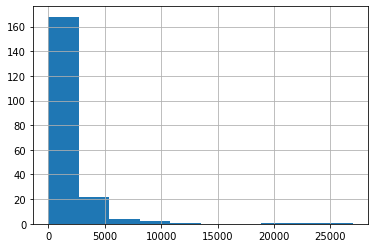

In [16]:
amostra.hist()

In [15]:
amostra.mean()

1964.205

In [13]:
amostra.std()

3139.8855167452093

### Dados do problema

In [18]:
media = 1964.20
desviop = 3139.88

# <font color='blue'>Solução do item 2</font>

### Obtenha a margem de erro

#### <font color='red'>Lembre-se que a margem de erro deve estar na mesma unidade da variável que está sendo estudada (R$)</font>

In [21]:
erro = round(0.10 * media, 2)
erro

196.42

### Tamanho da amostra ($1 - \alpha = 90\%$)

In [24]:
z = norm.ppf(0.95)

n = (z * (desviop/erro)) ** 2
int(n.round())

691

### Tamanho da amostra ($1 - \alpha = 95\%$)

In [29]:
z = norm.ppf(0.975)

n = (z * (desviop/erro)) ** 2
int(n.round())

982

### Tamanho da amostra ($1 - \alpha = 99\%$)

In [30]:
z = norm.ppf(0.995)

n = (z * (desviop/erro)) ** 2
int(n.round())

1695

# <font color='blue'>Solução do item 3</font>

### Custo da pesquisa para o nível de confiança de 90%

In [31]:
691 * 100

69100

### Custo da pesquisa para o nível de confiança de 95%

In [38]:
982 * 100
n

98200

### Custo da pesquisa para o nível de confiança de 99%

In [33]:
1695 * 100

169500

# <font color='blue'>Solução do item 4</font>

In [36]:
intervalo = (
    media - erro,
    media + erro
)
intervalo

(1767.78, 2160.62)

In [41]:
norm.interval(confidence = 0.95, loc = media, scale = (desviop / np.sqrt(982)))

(1767.8163183251404, 2160.5836816748597)

# <font color='blue'>Solução do item 5</font>

In [43]:
# nova amostra - qnt de pessoas
150000 / 100

1500.0

In [44]:
z = norm.ppf(0.975)

erro = z * (desviop / np.sqrt(1500))
erro

158.89693204603947

In [48]:
e_percentual = erro / media
print('A nova margem de erro é {:.2f}%'.format(e_percentual * 100))

A nova margem de erro é 8.09%


# <font color='blue'>Solução do item 6</font>

In [52]:
erro = 0.05 * media
print('A margem de erro é de R$%0.2f para mais ou para menos' % (erro))

A margem de erro é de R$98.21 para mais ou para menos


In [58]:
z = norm.ppf(0.975)

n = (z * (desviop/erro)) ** 2
int(n.round())

print(f'Precisariamos entrevistar {int(n)} pessoas')

Precisariamos entrevistar 3926 pessoas


In [56]:
print(f'O custo da pesquisa com a nova margem de erro seria R${(n * 100).round(2)}')

O custo da pesquisa com a nova margem de erro seria R$392654.75
